In [1]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection 
import matplotlib.colors as mplcolors

In [2]:
def random_mpl_color_rgb():
    return (np.random.uniform(),np.random.uniform(),np.random.uniform())

def random_mpl_color_rgba(alpha=0.25):
    rgba_tup = random_mpl_color_rgb() + (alpha,)
    return rgba_tup

def random_mpl_color_rgb_rgba(alpha=0.25):
    """
    generate a pair of rgb and rgba color, both of them have same R G B value.
    """
    rgb_tup = random_mpl_color_rgb()
    rgba_tup = rgb_tup + (alpha,)
    return rgb_tup, rgba_tup
class Boite:
    def __init__(self, point_ref, longeur, largeur, hauteur):
        assert isinstance(point_ref, tuple)
        assert len(point_ref) == 3
        self.x = point_ref[0]
        self.y = point_ref[1]
        self.z = point_ref[2]
        self.longeur = longeur
        self.largeur = largeur
        self.hauteur = hauteur
        
        self._temp_sommets = np.array([[-longeur/2.0, -largeur/2.0, -hauteur/2.0],
                                       [longeur/2.0, -largeur/2.0, -hauteur/2.0],
                                       [longeur/2.0, largeur/2.0, -hauteur/2.0],
                                       [-longeur/2.0, largeur/2.0, -hauteur/2.0],
                                       [-longeur/2.0, -largeur/2.0, hauteur/2.0],
                                       [longeur/2.0, -largeur/2.0, hauteur/2.0],
                                       [longeur/2.0, largeur/2.0, hauteur/2.0],
                                       [-longeur/2.0, largeur/2.0, hauteur/2.0]])
        
    def translation(self, length_x, length_y, length_z):
        self.x = self.x + length_x
        self.y = self.y + length_y
        self.z = self.z + length_z
    def rotation3d(self, alpha, beta, gamma):
        """
        :param alpha: perform a rotation about x axis
        :param beta: perform a rotation about y axis
        :param gamma: perform a rotation about z axis
        :return:
        """
        rx = np.array([[1, 0, 0],
                       [0, np.cos(alpha), -np.sin(alpha)],
                       [0, np.sin(alpha), np.cos(alpha)]])
        ry = np.array([[np.cos(beta), 0, np.sin(beta)],
                       [0, 1, 0],
                       [-np.sin(beta), 0, np.cos(beta)]])
        rz = np.array([[np.cos(gamma), -np.sin(gamma), 0],
                       [np.sin(gamma), np.cos(gamma), 0],
                       [0, 0, 1]])
        self._temp_sommets = np.transpose(rz.dot(ry.dot(rx.dot(np.transpose(self._temp_sommets)))))
        self._update_verts()
    def _update_sommets(self):
        # after some operation we need to translate object to real location.
        self.sommets = np.ones((self._temp_sommets.shape[0], 1))*np.array([self.x, self.y, self.z]) + self._temp_sommets
    def _update_verts(self):
        # obtain all surfaces.
        self._update_sommets()
        self.verts = [[self.sommets[0], self.sommets[1], self.sommets[2], self.sommets[3]],
                 [self.sommets[4], self.sommets[5], self.sommets[6], self.sommets[7]],
                 [self.sommets[0], self.sommets[1], self.sommets[5], self.sommets[4]],
                 [self.sommets[2], self.sommets[3], self.sommets[7], self.sommets[6]],
                 [self.sommets[1], self.sommets[2], self.sommets[6], self.sommets[5]],
                 [self.sommets[4], self.sommets[7], self.sommets[3], self.sommets[0]]]
    def getVerts(self):
        self._update_verts()
        return self.verts

    def getSommets(self):
        self._update_sommets()
        return self.sommets

    def getPoly3d(self, facecolors=None, edgecolors=None):
        if facecolors==None and edgecolors==None:
            edgecolors, facecolors = random_mpl_color_rgb_rgba()
        elif facecolors == None and edgecolors != None:
            if isinstance(edgecolors, str):
                edgecolors = mplcolors.to_rgb(edgecolors)
            assert isinstance(edgecolors, tuple)
            facecolors=(edgecolors[0], edgecolors[1], edgecolors[2])+(0.25,)
        elif edgecolors == None and facecolors != None:
            if isinstance(facecolors, str):
                facecolors = mplcolors.to_rgb(facecolors)
            assert isinstance(facecolors, tuple)
            edgecolors=(facecolors[0], facecolors[1], facecolors[2])
        self._update_verts()
        poly3d = Poly3DCollection(self.verts,
                         facecolors=facecolors, linewidths=1, edgecolors=edgecolors)
        return poly3d
 

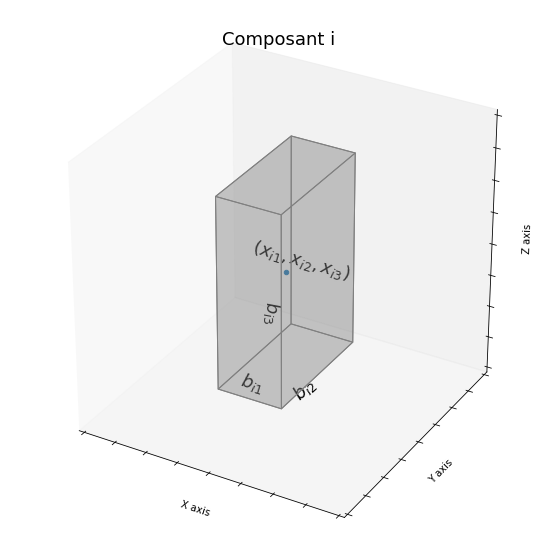

In [33]:
# matplotlib.rcParams['text.usetex'] = True

boite  = Boite((1,1,1), 1, 2, 3)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="3d")
ax.set_aspect(1)
ax.set_xlim(-1, 3)
ax.set_ylim(-1, 3)
ax.set_zlim(-1, 3)
ax.add_collection3d(boite.getPoly3d(edgecolors="gray"))

ax.scatter3D([1],[1],[1])
ax.text(0.3,1+0.2,1, "$(x_{i1}, x_{i2}, x_{i3})$",'x', fontsize="18")
ax.text(boite.getSommets()[0][0]+0.2, boite.getSommets()[0][1]+0.2, boite.getSommets()[0][2], "$b_{i1}$", 'x',fontsize="18")
ax.text(boite.getSommets()[1][0], boite.getSommets()[1][1]+0.2, boite.getSommets()[1][2]+0.2, "$b_{i2}$", 'y',fontsize="18")
ax.text(boite.getSommets()[1][0]-0.2, boite.getSommets()[1][1]-0.2, boite.getSommets()[1][2]+1.5, "$b_{i3}$", 'z',fontsize="18")
ax.grid(False)

ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.title("Composant i", fontsize="18")
plt.show()

In [34]:
plt.savefig("composant.png")

<Figure size 432x288 with 0 Axes>